# ANALISIS Y PROCESAMIENTO 

In [1005]:
# Se importan las librerías que se utilizarán: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as stats
import re
import heapq

In [1006]:
# Se importa el dataset final (CSV) y se visualiza
pelis=pd.read_csv(r'..\\datasets\\peliculas1.csv')
pelis.head(5)

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,descripcion,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,amazon


In [1007]:
# Se observa la cantidad de filas y columnas del dataframe
forma = pelis.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 14997 filas y 11 columnas'

In [1008]:
# Se observan las ultimas 5 filas
pelis.tail(5)

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,descripcion,plataforma
14992,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,disney
14993,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,disney
14994,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",disney
14995,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,disney
14996,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.,disney


In [1009]:
# Se borran las columnas que no utilizaremos en esta etapa
pelis = pelis.drop(['descripcion'],axis=1)
pelis

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",amazon
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",amazon
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",amazon
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,amazon
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",amazon
...,...,...,...,...,...,...,...,...,...,...
14992,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
14993,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
14994,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
14995,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


In [1010]:
# Se Agrupan los datos por los valores de la columna "plataforma" y calcula la suma de valores faltantes por columna en cada grupo
missing_values_por_plataforma = pelis.groupby('plataforma').apply(lambda x: x.isnull().sum()).T

# Se Muestran los valores faltantes por columna agrupados por "plataforma"
print(missing_values_por_plataforma)

plataforma     amazon  disney  netflix
show_id             0       0        0
tipo                0       0        0
titulo              0       0        0
director          229      75      188
elenco            764     119      475
anio                0       0        0
clasificacion     331       1        2
duracion            0       0        3
listado_en          0       0        0
plataforma          0       0        0


### Se observa que aunque se han eliminado algunas columnas con gran propoción de datos faltantes, quedan algunas filas con datos faltantes en otras columnas </br>
### Dado que no es posible imputar los datos faltantes (por la naturaleza no numérica de los mismos), se liminan las filas con datos faltantes. 

In [1011]:
# Se borran las filas con datos faltantes
df=pelis.dropna()
df

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",amazon
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87 min,"Horror, Science Fiction",amazon
17,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104 min,Science Fiction,amazon
18,s23,Movie,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR,62 min,"Arts, Entertainment, and Culture, Comedy, Drama",amazon
19,s25,Movie,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94 min,Drama,amazon
...,...,...,...,...,...,...,...,...,...,...
14992,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
14993,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
14994,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
14995,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


In [1012]:
# Se agrupan los datos de acuerdo a los valores de la columna "plataforma" y se calcula la suma de valores faltantes por columna en cada grupo
missing_values_por_plataforma = df.groupby('plataforma').apply(lambda x: x.isnull().sum()).T

# Se muetran los valores faltantes por columna agrupados por "plataforma"
print(missing_values_por_plataforma)

plataforma     amazon  disney  netflix
show_id             0       0        0
tipo                0       0        0
titulo              0       0        0
director            0       0        0
elenco              0       0        0
anio                0       0        0
clasificacion       0       0        0
duracion            0       0        0
listado_en          0       0        0
plataforma          0       0        0


### Se observa que ya no hay datos faltantes.

In [1013]:
forma_df = pd.DataFrame({
    'Dataset': ['df'],
    'Filas': [df.shape[0]],
    'Columnas': [df.shape[1]]
})

forma_df

,Dataset,Filas,Columnas
0,df,13042,10


In [1014]:
forma_df = df.shape
print(f'El dataset ahora tiene {forma_df[0]} filas y {forma_df[1]} columnas')

El dataset ahora tiene 13042 filas y 10 columnas


In [1015]:
# Se observa el tipo de dato de cada columna:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13042 entries, 1 to 14996
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        13042 non-null  object
 1   tipo           13042 non-null  object
 2   titulo         13042 non-null  object
 3   director       13042 non-null  object
 4   elenco         13042 non-null  object
 5   anio           13042 non-null  int64 
 6   clasificacion  13042 non-null  object
 7   duracion       13042 non-null  object
 8   listado_en     13042 non-null  object
 9   plataforma     13042 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [1016]:
# Se guarda el dataframe en un CSV
df.to_csv('..\\datasets\\peliculas2.csv', index=False)

In [1017]:
#
df=pd.read_csv(r'..\\datasets\\peliculas2.csv')
df

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",amazon
1,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87 min,"Horror, Science Fiction",amazon
2,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104 min,Science Fiction,amazon
3,s23,Movie,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR,62 min,"Arts, Entertainment, and Culture, Comedy, Drama",amazon
4,s25,Movie,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94 min,Drama,amazon
...,...,...,...,...,...,...,...,...,...,...
13037,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",disney
13038,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106 min,"Action-Adventure, Comedy, Family",disney
13039,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107 min,"Biographical, Comedy, Drama",disney
13040,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",disney


## Limpieza columna duracion

In [1018]:
# Se usa una expresión regular para dejar solo valores numéricos y luego convertimos a tipo integer
df['duracion'] = df['duracion'].apply(lambda x: re.sub(r'[^0-9]', '', x)).astype(int)

In [1019]:
# Se verifica que se haya eliminado "min" y que se haya cambiado el tipo de dato 
uniquedur = df['duracion'].unique()
print(uniquedur)

[110  87 104  62  94  86 103   9  18  14  20  19  22  60   6  54   5  84
 126 125 109  89  85 111  95  99  78  77  55 115  58  49 135  64  59 122
  92  90 102  65 114  56 136  70 138 113 100 152  68  57  96  98  88 151
 149 141 121  48 140 106  27  69 107 108  91  93  38 157 118 112  15 142
  75  71  52  66 159  67 164 116  73  80  61  79  83  44  45 120  53  97
  74 105  82  50 127 101 161  72  81  33 123  43   0 124 143  35  47 170
   3 146 132 154 128 133 153 148 119  63 169 174 144 137  76 134 163 139
 145 162  32  46  39  41 147 155 117 167  30   2  42 129 178  24 171 172
 173  31   7 166 160 130  13  11  51   8  17  40 158 131   4 183  10  25
  12 150  16  23 181 156  34  21 177 550  28 193 165 175  36 180 188 187
 176 168 190 185 209 192 182  26   1 207 540  37 269 191 229 189 204 212
 224  29 203 194 233 237 230 195 253 208 186 214 179 200 196 228 205 201]


In [1020]:
# Se consultan las estadísticas que describen los valores numéricos del dataframe: (anio y duracion)
df.describe()

,anio,duracion
count,13042.000000,13042.000000
mean,2008.416654,97.096458
std,17.613623,29.542137
min,1920.000000,0.000000
25%,2006.000000,84.000000
50%,2015.000000,96.000000
75%,2019.000000,112.000000
max,2021.000000,550.000000


In [1021]:
# Se cuenta la cantidad de filas para cada clasificacion
contar_clas = df['duracion'].value_counts()
print(contar_clas)

90     352
91     352
94     332
92     317
93     314
      ... 
540      1
207      1
1        1
550      1
201      1
Name: duracion, Length: 216, dtype: int64


## Limpieza columna clasificacion

In [1022]:
# Se cuenta la cantidad de filas para cada clasificacion
contar_clas2 = df['clasificacion'].value_counts()
print(contar_clas2)

TV-MA       1842
R           1778
13+         1737
TV-14       1300
16+         1219
18+         1068
PG-13        925
PG           751
TV-PG        575
ALL          547
G            346
TV-G         259
7+           237
NR           164
TV-Y7        137
TV-Y         100
UNRATED       33
TV-Y7-FV       8
NC-17          4
UR             3
NOT_RATE       3
AGES_18_       3
AGES_16_       2
16             1
Name: clasificacion, dtype: int64


### Se observa que hay muchas categorías repetidas ya que los datos no están normalizados. Se procede a limpiar y normalizar.

In [1023]:
df['clasificacion'] = df['clasificacion'].replace(['UNRATED', 'UR'], 'UR/No clasificado')
df['clasificacion'] = df['clasificacion'].replace(['NOT RATED', 'NOT_RATE', 'NR'], 'NR/Sin clasificacion')
df['clasificacion'] = df['clasificacion'].replace(['ALL', 'ALL_AGES'], 'ALL')
df['clasificacion'] = df['clasificacion'].replace(['AGES_18_'], '18+')
df['clasificacion'] = df['clasificacion'].replace(['16','AGES_16_','16+'], '16+')

In [1024]:
# Se cuenta la cantidad de filas para cada clasificacion
contar_clas3 = df['clasificacion'].value_counts()
print(contar_clas3)

TV-MA                   1842
R                       1778
13+                     1737
TV-14                   1300
16+                     1222
18+                     1071
PG-13                    925
PG                       751
TV-PG                    575
ALL                      547
G                        346
TV-G                     259
7+                       237
NR/Sin clasificacion     167
TV-Y7                    137
TV-Y                     100
UR/No clasificado         36
TV-Y7-FV                   8
NC-17                      4
Name: clasificacion, dtype: int64


### Datos de clasificación normalizados, procedemos a graficar. 

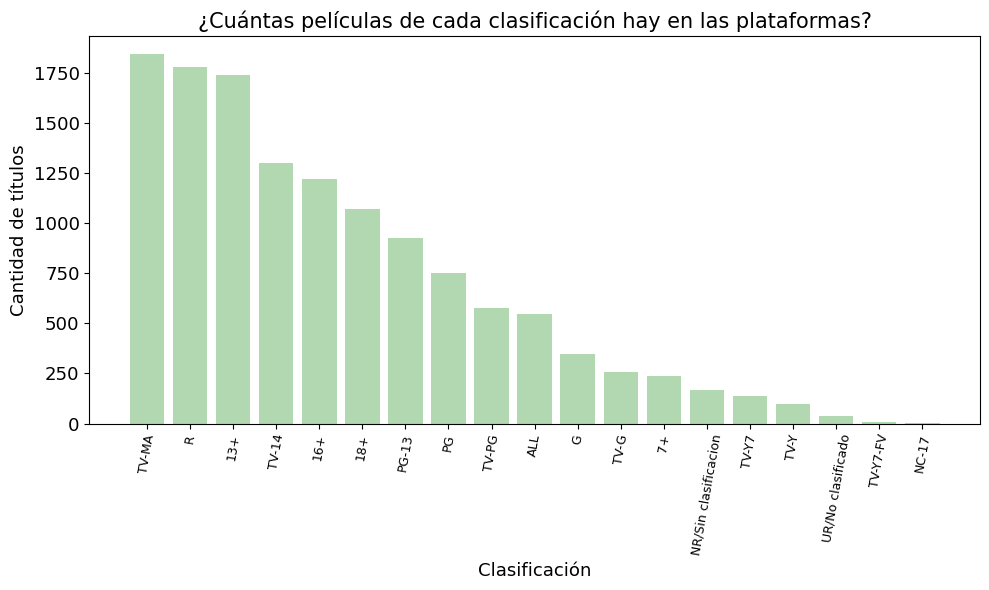

In [1025]:
# Se crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contar_clas3.index, contar_clas3.values, color="green", alpha=0.3)
plt.xlabel('Clasificación', fontsize=13)
plt.ylabel('Cantidad de títulos', fontsize=13)
plt.title('¿Cuántas películas de cada clasificación hay en las plataformas?', fontsize=15)
plt.xticks(rotation=80, fontsize=9)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

## ¿Cuántas películas de cada año hay en cada plataforma?

<Figure size 1000x600 with 0 Axes>

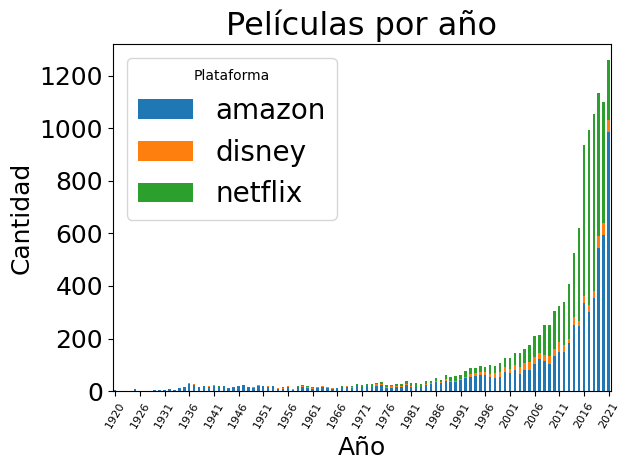

In [1026]:
# Agrupar por tipo y anio, y contar la cantidad de filas
contar_anio = df.groupby(['anio', 'plataforma']).size().unstack()

# Crear un gráfico de barras apiladas con anio en el eje x
plt.figure(figsize=(10, 6))
contar_anio.plot(kind='bar', stacked=True) 
plt.xlabel('Año', fontsize = 18)
plt.ylabel('Cantidad', fontsize = 18)
plt.title('Películas por año', fontsize = 23)
plt.legend(title='Plataforma', fontsize = 20)
plt.xticks(range(0, len(contar_anio), 5), rotation = 60, fontsize = 8) 
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.show()

## Columna listado_en: categorías y géneros¶


In [1027]:
# Se observan los 10 primeros géneros 
df['listado_en'].head(10)

0                               Drama, International
1                            Horror, Science Fiction
2                                    Science Fiction
3    Arts, Entertainment, and Culture, Comedy, Drama
4                                              Drama
5                                              Drama
6                                              Drama
7                          Fitness, Special Interest
8           Faith and Spirituality, Special Interest
9                          Fitness, Special Interest
Name: listado_en, dtype: object

In [1028]:
# Se deja el género más representativo dela película
df['genero'] = df['listado_en'].str.split(',').str[0]
df

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,listado_en,plataforma,genero
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,"Drama, International",amazon,Drama
1,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,"Horror, Science Fiction",amazon,Horror
2,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,Science Fiction,amazon,Science Fiction
3,s23,Movie,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,"Arts, Entertainment, and Culture, Comedy, Drama",amazon,Arts
4,s25,Movie,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,Drama,amazon,Drama
...,...,...,...,...,...,...,...,...,...,...,...
13037,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108,"Action-Adventure, Family, Science Fiction",disney,Action-Adventure
13038,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106,"Action-Adventure, Comedy, Family",disney,Action-Adventure
13039,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107,"Biographical, Comedy, Drama",disney,Biographical
13040,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112,"Buddy, Comedy, Coming of Age",disney,Buddy


In [1029]:
# Se obtienen los valores unicos de la columna listado_en (generos)
df['listado_en'].unique()                    

array(['Drama, International', 'Horror, Science Fiction',
       'Science Fiction',
       'Arts, Entertainment, and Culture, Comedy, Drama', 'Drama',
       'Fitness, Special Interest',
       'Faith and Spirituality, Special Interest', 'Special Interest',
       'Action, Military and War, Western',
       'Fantasy, Science Fiction, Suspense', 'Suspense',
       'Documentary, LGBTQ', 'Action, Drama', 'Drama, Suspense', 'Comedy',
       'Western', 'Action, Drama, Sports',
       'Documentary, Special Interest',
       'Arts, Entertainment, and Culture, Comedy',
       'Arts, Entertainment, and Culture, Comedy, Special Interest',
       'Documentary, International, Special Interest',
       'Comedy, Science Fiction', 'Action', 'Documentary',
       'Arts, Entertainment, and Culture', 'Action, Science Fiction',
       'Documentary, Faith and Spirituality, Special Interest',
       'Action, Drama, Special Interest', 'Drama, Young Adult Audience',
       'Drama, Military and War', 'Arthous

In [1030]:
# Se borra la columna  listado_en
df=df.drop(['listado_en'],axis=1)

Como la columna: listado_en posee el género o la denominación que establece la plataforma. Se observan multiples datos. En primer lugar se reducieron esos datos al renombrar los géneros, y categorías re agrupando los mismos. En segundo lugar se separaron en 5 generos, creando 5 columnas. Luego de estudiarlos y analizarlos se decide dejar el género más representativo que es el de la columna gen1.

Encontrar todos los posibles géneros y categorías, sin repeticiones:

In [1031]:
generos=df['genero'].unique()
generos

array(['Drama', 'Horror', 'Science Fiction', 'Arts', 'Fitness',
       'Faith and Spirituality', 'Special Interest', 'Action', 'Fantasy',
       'Suspense', 'Documentary', 'Comedy', 'Western', 'Arthouse',
       'Military and War', 'Anime', 'International', 'Kids', 'Sports',
       'Adventure', 'Animation', 'Romance', 'Music Videos and Concerts',
       'Young Adult Audience', 'LGBTQ', 'Historical',
       'Children & Family Movies', 'Dramas', 'Comedies', 'Thrillers',
       'Horror Movies', 'Action & Adventure', 'Documentaries',
       'International Movies', 'Sci-Fi & Fantasy', 'Classic Movies',
       'Stand-Up Comedy', 'Movies', 'Anime Features', 'Cult Movies',
       'Independent Movies', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'Musical', 'Biographical', 'Action-Adventure',
       'Coming of Age', 'Concert Film', 'Family', 'Crime',
       'Animals & Nature', 'Dance', 'Buddy', 'Anthology'], dtype=object)

In [1032]:
# Se eliminan los espacios en blanco adicionales en la columna "listado_en"
df['genero']= df['genero'].str.replace(r'\s+', ' ', regex=True)

In [1033]:
# Se eliminan los espacios en blanco adicionales al principio y al final de cada valor
df['genero'] = df['genero'].str.strip()

In [1034]:
# Se corrigen los duplicados

df['genero'] = df['genero'].replace(' Sports movies', ' Sports')
df['genero'] = df['genero'].replace([' Romantic movies','Romantic Movies', ' Romance'], 'Romance')
df['genero'] = df['genero'].replace(['Comedies',' Comedies',' Comedy' ], 'Comedy')
df['genero'] = df['genero'].replace(['Documentaries',' Documentaries',' Documentary'],'Documentary')
df['genero'] = df['genero'].replace([' Dramas',' Drama','drama','Dramas'], 'Drama')
df['genero'] = df['genero'].replace('Action & Adventure', 'Action-Adventure')
df['genero'] = df['genero'].replace(' Adventure', 'Adventure')
df['genero'] = df['genero'].replace(['Animation',' Animation', 'Anime'],'Animation')
df['genero'] = df['genero'].replace('LGBTQ Movies', 'LGBTQ')
df['genero'] = df['genero'].replace(['Music & Musicals','Music Videos and Concerts'], 'Musical')
df['genero'] = df['genero'].replace([' Faith & Spirituality',' Faith and Spirituality'], 'Faith and Spirituality')
df['genero'] = df['genero'].replace([' Horror Movies', 'Horror Movies',' Horror' ], 'Horror')
df['genero'] = df['genero'].replace([' International Movies','International Movies',' International'], 'International')
df['genero'] = df['genero'].replace([' Thrillers', 'Thrillers'], ' Thriller')
print(df['genero'])

0                   Drama
1                  Horror
2         Science Fiction
3                    Arts
4                   Drama
               ...       
13037    Action-Adventure
13038    Action-Adventure
13039        Biographical
13040               Buddy
13041    Action-Adventure
Name: genero, Length: 13042, dtype: object


In [1035]:
# Se verifica los cambios, consultando todas las categorías de la columna genero 
generos=df['genero'].unique()
generos

array(['Drama', 'Horror', 'Science Fiction', 'Arts', 'Fitness',
       'Faith and Spirituality', 'Special Interest', 'Action', 'Fantasy',
       'Suspense', 'Documentary', 'Comedy', 'Western', 'Arthouse',
       'Military and War', 'Animation', 'International', 'Kids', 'Sports',
       'Adventure', 'Romance', 'Musical', 'Young Adult Audience', 'LGBTQ',
       'Historical', 'Children & Family Movies', ' Thriller',
       'Action-Adventure', 'Sci-Fi & Fantasy', 'Classic Movies',
       'Stand-Up Comedy', 'Movies', 'Anime Features', 'Cult Movies',
       'Independent Movies', 'Biographical', 'Coming of Age',
       'Concert Film', 'Family', 'Crime', 'Animals & Nature', 'Dance',
       'Buddy', 'Anthology'], dtype=object)

In [1036]:
#Se observan los 10 géneros más frecuentes
genero8=df['genero'].value_counts().head(8)
print(genero8)


Drama                       3425
Comedy                      2503
Action                      1428
Action-Adventure            1146
Documentary                  829
Horror                       749
Children & Family Movies     548
Arts                         359
Name: genero, dtype: int64


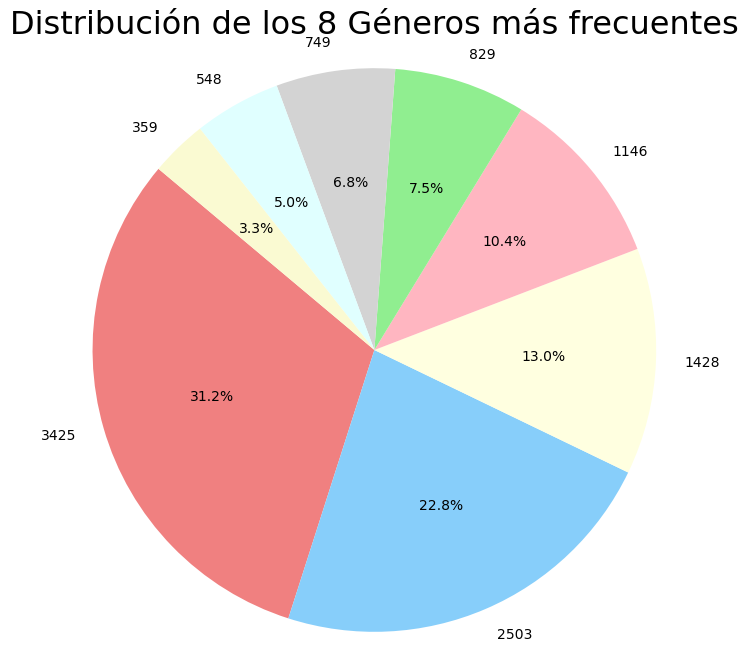

In [1037]:
# Se muestran los valores representados en un gráfico de torta
plt.figure(figsize=(8, 8))
datos = genero8.values
etiquetas = genero8.index 
datos = genero8.values
etiquetas = genero8
datos = genero8.values
etiquetas =datos = genero8.values
etiquetas
colores = ['lightcoral', 'lightskyblue', 'lightyellow', 'lightpink', 'lightgreen', 'lightgray', 'lightcyan', 'lightgoldenrodyellow']
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los 8 Géneros más frecuentes',fontsize = 23)
plt.axis('equal')  
plt.show()

# Depurado columna director

In [1038]:
# Se obtienen los valores unicos de la columna director
directores=df['director'].unique() 
directores

array(['Girish Joshi', 'Glenn Miller', 'Drake Doremus', ..., 'Gavin Hood',
       'Dexter Fletcher', 'Mark Waring'], dtype=object)

In [1039]:
# Se borran las filas que contengan el valor 1 en la columna director
df = df[df['director'] != '1']
df

,show_id,tipo,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,amazon,Drama
1,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,amazon,Horror
2,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,amazon,Science Fiction
3,s23,Movie,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,amazon,Arts
4,s25,Movie,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,amazon,Drama
...,...,...,...,...,...,...,...,...,...,...
13037,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...",2009,PG-13,108,disney,Action-Adventure
13038,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...",2009,PG,106,disney,Action-Adventure
13039,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",2016,PG-13,107,disney,Biographical
13040,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",2003,PG-13,112,disney,Buddy


In [1040]:
# Se obtienen todos los datos de la columna director ordenado alfabeticamente para analizarlos 
directores_ordenados = df['director'].sort_values()
print(directores_ordenados)

6583          20th_century_fox
6630          20th_century_fox
3855     9 Story Entertainment
3108           A Gokul Krishna
5113              A. Bhimsingh
                 ...          
10217         Ömer Faruk Sorak
7235              Şenol Sönmez
8735              Şenol Sönmez
12949                朱家欣 , 钟智行
2135                      藤村明世
Name: director, Length: 13026, dtype: object


In [1041]:
# Se filtran los datos que contienen "jr" o "Jr" en la columna "director"
directores_con_jr = df[df['director'].str.contains(r'jr', case=False, na=False)]
print(directores_con_jr['director'])

109                            Ernie Reyes Jr.
133                             Craig Ross Jr.
166                           Gordon Parks Jr.
181                  Angelo J. Guglielmo,  Jr.
239                       Timothy Woodward Jr.
1158                            James Reed Jr.
1191                   William H. Bushnell Jr.
1670                        Michael Landon Jr.
2062                            Atul Manjrekar
2114                        Michael Landon Jr.
2292                   Mikey Indio Cedano,  Jr
2398                             Gil Cates Jr.
2400                         Thomas Freeman Jr
3156                        Robert L Butler Jr
3377                Emmanuel Osei-Kuffour,  Jr
3393      Alfred Castillo Jr., Lamarcus Tinker
4078                          Jesse Wallace Jr
4888                          Gordon Parks Jr.
5383                         Richard Bates Jr.
5440                            Craig Ross Jr.
5448                        Sterling Macer Jr.
5457         

In [1042]:
# Reemplaza ", Jr" por ".Jr" en la columna "director"
df['director'] = df['director'].str.replace(', Jr','Jr')
df['director'] = df['director'].str.replace(', Jr.','Jr')
df['director'] = df['director'].str.replace(',  Jr.','Jr')
df['director'] = df['director'].str.replace(',  Jr','Jr')
df['director'] = df['director'].str.replace('.Jr.','Jr')
print(df['director'])

0           Girish Joshi
1           Glenn Miller
2          Drake Doremus
3           William Nigh
4          Sam Pillsbury
              ...       
13037         Gavin Hood
13038         Shawn Levy
13039    Dexter Fletcher
13040    Gurinder Chadha
13041        Mark Waring
Name: director, Length: 13026, dtype: object


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11300\1349899687.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['director'] = df['director'].str.replace(', Jr.','Jr')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11300\1349899687.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['director'] = df['director'].str.replace(',  Jr.','Jr')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11300\1349899687.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['director'] = df['director'].str.replace('.Jr.','Jr')


In [1043]:
# Se verifican los cambios
directores_con_jr = df[df['director'].str.contains(r'jr', case=False, na=False)]
print(directores_con_jr['director'])

109                            Ernie ReyesJr
133                             Craig RossJr
166                           Gordon ParksJr
181                    Angelo J. GuglielmoJr
239                       Timothy WoodwardJr
1158                            James ReedJr
1191                   William H. BushnellJr
1670                        Michael LandonJr
2062                          Atul Manjrekar
2114                        Michael LandonJr
2292                    Mikey Indio CedanoJr
2398                             Gil CatesJr
2400                       Thomas Freeman Jr
3156                      Robert L Butler Jr
3377                 Emmanuel Osei-KuffourJr
3393      Alfred CastilloJr, Lamarcus Tinker
4078                        Jesse Wallace Jr
4888                          Gordon ParksJr
5383                         Richard BatesJr
5440                            Craig RossJr
5448                        Sterling MacerJr
5457                          Cuba GoodingJr
5490      

In [1044]:
# Se dividen los valores en columnas separadas, al mismo tiempo se genera un dataset nuevo de directores, que relaciona los id con los generos de cada pelicula
directores = pd.concat([df['show_id'],df['director'].str.split(',', expand=True)], axis=1)

In [1045]:
# Se renombran las columnas
directores.columns = ['show_id', 'director1', 'director2', 'director3', 'director4', 'director5','director6', 'director7', 'director8', 'director9', 'director10','director11', 'director12', 'director13', 'director14', 'director15', 'director16', 'director17']
directores

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17
0,s2,Girish Joshi,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,s17,Glenn Miller,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,s20,Drake Doremus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,s23,William Nigh,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,s25,Sam Pillsbury,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13037,s1446,Gavin Hood,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13038,s1447,Shawn Levy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13039,s1448,Dexter Fletcher,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
13040,s1449,Gurinder Chadha,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [1046]:
# Se observa si en la última fila hay datos
directores_sin_none = directores[directores['director16'].notna()]
print(directores_sin_none['director16'])

2824     Robin Tremblay
Name: director16, dtype: object


In [1047]:
pd.get_dummies(directores, columns=["director1" ])

,show_id,director2,director3,director4,director5,director6,director7,director8,director9,director10,...,director1_Çagan Irmak,director1_Émile Gaudreault,director1_Érik Canuel,director1_Étienne Chatiliez,director1_Ísold Uggadóttir,director1_Óskar Thór Axelsson,director1_Ömer Faruk Sorak,director1_Şenol Sönmez,director1_朱家欣,director1_藤村明世
0,s2,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
1,s17,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
2,s20,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
3,s23,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
4,s25,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13037,s1446,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
13038,s1447,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
13039,s1448,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
13040,s1449,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0


In [1048]:
# Se crea la columna direccion, cuando asigna el valor 1, refiere a un sólo director; si le asigna el valo 0 refiere a dos o más directores. 
directors= directores['direccion'] = directores['director2'].apply(lambda x: 1 if x is None else 0)
directores

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17,direccion
0,s2,Girish Joshi,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
1,s17,Glenn Miller,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
2,s20,Drake Doremus,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
3,s23,William Nigh,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
4,s25,Sam Pillsbury,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13037,s1446,Gavin Hood,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
13038,s1447,Shawn Levy,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
13039,s1448,Dexter Fletcher,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1
13040,s1449,Gurinder Chadha,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1


In [1049]:
# Se guarda el dataframe en un archivo CSV
directores= directores.to_csv(r'C:\Users\Usuario\Desktop\data science\GRUPO 9 FINAL\IngeniasDataScience\datasets\directores.csv', index=False)

In [1050]:
directores=pd.read_csv(r'..\\datasets\\directores.csv')
directores

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17,direccion
0,s2,Girish Joshi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,s17,Glenn Miller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,s20,Drake Doremus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,s23,William Nigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,s25,Sam Pillsbury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,s1446,Gavin Hood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13022,s1447,Shawn Levy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13023,s1448,Dexter Fletcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13024,s1449,Gurinder Chadha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [1051]:
directores=pd.concat([directores1['director1'],directores1['director2'],directores1['director3'],directores1['director4']],axis=0)
directores2.shape

NameError: name 'directores1' is not defined

In [ ]:
directores.tail(10)

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17,direccion
13016,s1438,Wolfgang Reitherman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13017,s1439,Norman Tokar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13018,s1443,Brad Bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13019,s1444,Elizabeth Allen Rosenbaum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13020,s1445,Carlos Saldanha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13021,s1446,Gavin Hood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13022,s1447,Shawn Levy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13023,s1448,Dexter Fletcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13024,s1449,Gurinder Chadha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13025,s1450,Mark Waring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#Se verifica:
valores_diferentes_de_1 = directores[directores['direccion'] != 1]
valores_diferentes_de_1

,show_id,director1,director2,director3,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13,director14,director15,director16,director17,direccion
0,s2,Girish Joshi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,s17,Glenn Miller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,s20,Drake Doremus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,s23,William Nigh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,s25,Sam Pillsbury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,s1446,Gavin Hood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13022,s1447,Shawn Levy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13023,s1448,Dexter Fletcher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13024,s1449,Gurinder Chadha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Depurado columna elenco

In [ ]:
# Se importa el dataset destinado a depurar la columna elenco 
cast=pd.read_csv('df_castData1.csv', delimiter=';', encoding = 'utf8',on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: 'df_castData1.csv'

In [ ]:
cast

Para el tratamiento de la columna elenco, dado que tiene varios datos, ya que se nombran varios actores; se decide utilizar un set de datos para filtrar los actores/actrices que hayan sido galardonados con algún premio oscar. En caso de que la película no cuente con ningún ganador de este premio, se eligirá al primer actor, ya que es el principal. 
Aclaración: el set de datos utilizado para este tratamiento fue manipulado en excel, ya que el formato no era el adecuado. 

In [ ]:
#Se borran las columnas que no se utilizarán 
cast1=cast.drop(['female', 'birthdate', 'birthplace','link'],axis=1)

NameError: name 'cast' is not defined

In [ ]:
# Se nombran la columna
cast1.columns = ['nombre_actor']

NameError: name 'cast1' is not defined

In [ ]:
cast1

NameError: name 'cast1' is not defined

In [ ]:
# Se obtienen los actores premiados del dataset 
coincidencias = pd.merge(pel, cast1, left_on='elenco', right_on='nombre_actor', how='left')

NameError: name 'pel' is not defined

In [ ]:
coincidencias

NameError: name 'coincidencias' is not defined

In [ ]:
# Se crea la columna "coincidencias" con los valores coincidentes
pel['coincidencias'] = coincidencias['nombre_actor']
pel

NameError: name 'coincidencias' is not defined

In [ ]:
# Crea la columna "depurar" con los valores que no coinciden. En caso que no haya coincidencia se traen todos los actores
pel['depurar'] = pel['elenco'][~coincidencias['nombre_actor'].notna()]
pel

NameError: name 'pel' is not defined

In [ ]:
# Se crea la columna actor, con los actores galardonados con premios oscars, y en caso de que no haya con el actor principal de la película 
pel['actor'] = pel['elenco'].str.split(',').str[0]

NameError: name 'pel' is not defined

In [ ]:
pel

NameError: name 'pel' is not defined

In [ ]:
# Finalmente se borran las columnas que se usaron para la limpieza, obteniendose el set de datos con la coumna directores depurada:
pel.drop(['depurar', 'coincidencias', 'elenco'],axis=1)

NameError: name 'pel' is not defined